In [2]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
beer_test = pd.read_csv("data/beer_test.csv")

In [4]:
sampleSubmission = pd.read_csv("data/sampleSubmission.csv")

In [38]:
id_store_sku = pd.read_csv("data/id_store_sku.csv")
len(id_store_sku["Store"].unique())

267

In [6]:
sku_features = pd.read_csv("data/sku_features.csv")
sku_features

,SKU,Segment,Pack,Product,Brand,Volume
0,"_Carlsberg Can 0,45",MainStream,Can,Lager,Carlsberg,0.45
1,"_Flash Up Energy PET 0,5",High Margin,PET,Energy-drink,Flash,0.50
2,"_Holsten Bottle 0,47",Premium,Bottle,Lager,Holsten,0.50
3,"_Tuborg Green Can 0,45",Premium,Can,Lager,Tuborg,0.45
4,"_Tuborg Green Bottle 0,48",Premium,Bottle,Lager,Tuborg,0.50
5,"_Zatecky Gus Can 0,45",Premium,Can,Lager,Zatecky Gus,0.45
6,"_Zatecky Gus Bottle 0,48",Premium,Bottle,Lager,Zatecky Gus,0.50
7,"_Zatecky Gus PET 1,42",Premium,PET,Lager,Zatecky Gus,1.50
8,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
9,"_Baltika №3 Can 0,45",MainStream,Can,Lager,Baltika №3,0.45


In [7]:
beer_train = pd.read_csv("data/beer_train.csv")
beer_train

,Date,ts_id,isPromo,Sales
0,2015-06-15,0,0.0,0.100
1,2015-06-15,1,0.0,0.350
2,2015-06-15,2,1.0,0.600
3,2015-06-15,3,1.0,0.350
4,2015-06-15,4,0.0,0.150
...,...,...,...,...
1382316,2017-06-14,2059,0.0,0.405
1382317,2017-06-14,2060,0.0,0.180
1382318,2017-06-14,2061,1.0,0.810
1382319,2017-06-14,2062,1.0,0.360


In [8]:
id_store_sku["ts_id"].unique

<bound method Series.unique of 0          0
1          1
2          2
3          3
4          4
        ... 
1939    2059
1940    2060
1941    2061
1942    2062
1943    2063
Name: ts_id, Length: 1944, dtype: int64>

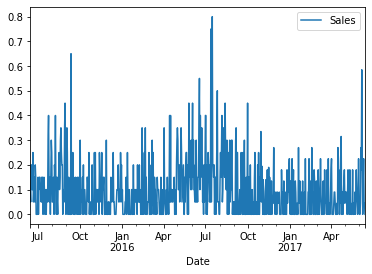

In [9]:
beer_train = pd.read_csv("data/beer_train.csv")
ts_id0 = beer_train[beer_train['ts_id']==0]
date_time = pd.to_datetime(ts_id0.pop('Date'), format='%Y-%m-%d')
plot_cols = ['Sales']
plot_features = ts_id0[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [10]:
result = pd.merge(id_store_sku, sku_features, on="SKU")
result

,ts_id,Store,SKU,Segment,Pack,Product,Brand,Volume
0,0,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
1,6,3302,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
2,15,3303,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
3,22,3304,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
4,29,3305,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
...,...,...,...,...,...,...,...,...
1939,1248,7978,"_Baltika Cooler Bottle 0,47",MainStream,Bottle,Lager,Baltika Cooler,0.50
1940,1409,8328,"_Baltika Cooler Bottle 0,47",MainStream,Bottle,Lager,Baltika Cooler,0.50
1941,1262,7979,"_Baltika Draught PET 0,47",Premium,PET,Other,Baltika Draught,0.50
1942,1416,8328,"_Firmennoe PET 1,42",Premium,PET,Other,Firmennoe,1.50


In [37]:
final_result = pd.merge(beer_train, result, on="ts_id")
final_result[final_result["SKU"]=="	_Baltika №0 Can 0,45"]
storesOr = final_result["Store"].unique()
stores =storesOr[:5]
len(storesOr)

256

Store 3301
Store 3302
Store 3303
Store 3304
Store 3305


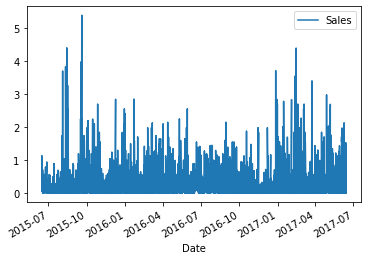

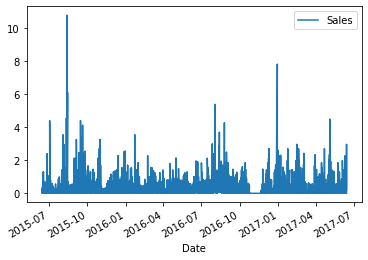

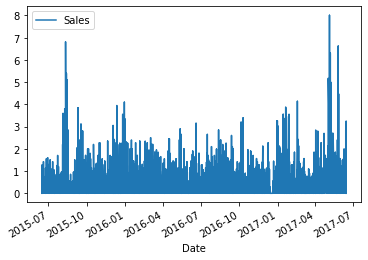

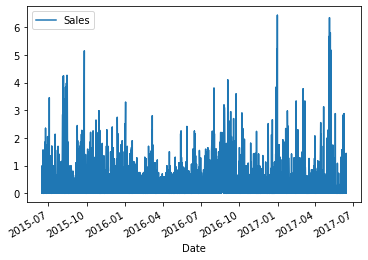

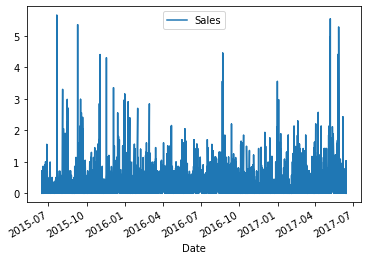

In [36]:
for s in stores:
    ts_id0 = final_result[final_result['Store']==s]
    print("Store",s)
    date_time = pd.to_datetime(ts_id0.pop('Date'), format='%Y-%m-%d')
    plot_cols = ['Sales']
    plot_features = ts_id0[plot_cols]
    plot_features.index = date_time
    _ = plot_features.plot(subplots=True)

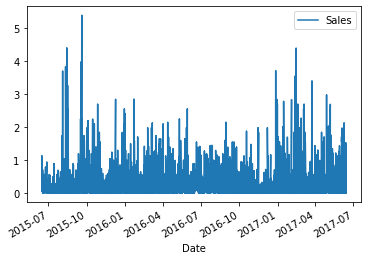

In [31]:
ts_id0 = final_result[final_result['Store']==stores[0]]
date_time = pd.to_datetime(ts_id0.pop('Date'), format='%Y-%m-%d')
plot_cols = ['Sales']
plot_features = ts_id0[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)